# FIFA 22 Player rating prediction

# Final Project



For this final project, you will 

- Step 0: Choose your Language for this Adventure

- Step 1: Find a Story

- Step 2: Remember your Audience

- Step 3: Find and Stage Your Data

- Step 4: Vet Data Sources

- Step 5: Filter Results and Build/Validate Models

- Step 6: Visualize Results

- Step 7: Communicate the Story to your intended audience using visualizations and narratives




## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview your story you hope to uncover.

## Preview
FIFA 22 is a soccersimulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. It is the 29th installment in the FIFA series, and was released on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows

This game did not recieve much popular reviews. However, we will have a deep analysis in this notebook. I will be predicting the soccer player ratings based on their attributes like Pace, passing, shooting, dribbling, skill moves, agility etc using Linear regression model.

Link to data source: https://www.kaggle.com/stefanoleone992/fifa-22-complete-player-dataset?select=players_22.csv



## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

* As this project is based on a soccer video game, any person/Data enthusiast who is interested in soccer or any other sports can understand this project

* Things to learn from this notebook: cleaning the data(handling null values, dropping unwanted data), linear regression, feature engineering.




## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.


Link to data source: https://www.kaggle.com/stefanoleone992/fifa-22-complete-player-dataset?select=players_22.csv


## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, conduct data carpentry and shaping; perform exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

# 1. Glimpse of data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('players_22.csv')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (22,105) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000,320000,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.com/players/158/023/22_120.png,https://cdn.sofifa.com/teams/73/60.png,https://cdn.sofifa.com/flags/fr.png,https://cdn.sofifa.com/teams/1369/60.png,https://cdn.sofifa.com/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000,270000,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.com/players/188/545/22_120.png,https://cdn.sofifa.com/teams/21/60.png,https://cdn.sofifa.com/flags/de.png,https://cdn.sofifa.com/teams/1353/60.png,https://cdn.sofifa.com/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000,270000,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.com/players/020/801/22_120.png,https://cdn.sofifa.com/teams/11/60.png,https://cdn.sofifa.com/flags/gb-eng.png,https://cdn.sofifa.com/teams/1354/60.png,https://cdn.sofifa.com/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000,270000,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.com/players/190/871/22_120.png,https://cdn.sofifa.com/teams/73/60.png,https://cdn.sofifa.com/flags/fr.png,NaN,https://cdn.sofifa.com/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000,350000,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.com/players/192/985/22_120.png,https://cdn.sofifa.com/teams/10/60.png,https://cdn.sofifa.com/flags/gb-eng.png,https://cdn.sofifa.com/teams/1325/60.png,https://cdn.sofifa.com/flags/be.png


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sofifa_id,19239.0,2.314713e+05,2.704000e+04,41.0,214414.5,236546.0,253537.5,264640.0
overall,19239.0,6.577218e+01,6.880232e+00,47.0,61.0,66.0,70.0,93.0
potential,19239.0,7.107937e+01,6.086213e+00,49.0,67.0,71.0,75.0,95.0
value_eur,19239.0,2.839488e+06,7.601091e+06,0.0,475000.0,975000.0,2000000.0,194000000.0
wage_eur,19239.0,8.989397e+03,1.944589e+04,0.0,1000.0,3000.0,8000.0,350000.0
age,19239.0,2.521082e+01,4.748235e+00,16.0,21.0,25.0,29.0,54.0
height_cm,19239.0,1.812997e+02,6.863179e+00,155.0,176.0,181.0,186.0,206.0
weight_kg,19239.0,7.494303e+01,7.069434e+00,49.0,70.0,75.0,80.0,110.0
league_level,19178.0,1.354364e+00,7.478651e-01,1.0,1.0,1.0,1.0,5.0
club_jersey_number,19178.0,2.094525e+01,1.790937e+01,1.0,9.0,18.0,27.0,99.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 107 entries, sofifa_id to nation_flag_url
dtypes: float64(12), int64(45), object(50)
memory usage: 15.7+ MB


Dropping the columns which are not required

# 2. Data Cleaning

In [11]:
pd.options.display.min_rows = 120
df.isnull().sum()
# 61 null values in club_name, league_name etc must have a common attribute
# If a player doesnt have a club name/ league name that means he is a free agent. He doesnt have a contract with any club. We will see how to handle them soon
# Many players gets transferred to other clubs instead of a loan that is why there are 18137 null values in club_loan_from
# Most of the players do get the call from the national team unless the person is inform which explains the huge null value number 18480 in the nation_position and nation_jersey_number we can remove these fields as they are not required for the prediction

sofifa_id                        0
player_url                       0
short_name                       0
long_name                        0
player_positions                 0
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
age                              0
dob                              0
height_cm                        0
weight_kg                        0
club_name                       61
league_name                     61
league_level                    61
club_position                   61
club_jersey_number              61
club_loaned_from             18137
club_joined                   1163
club_contract_valid_until       61
nationality                      0
nation_position              18480
nation_jersey_number         18480
preferred_foot                   0
weak_foot                        0
skill_moves                      0
international_reputation         0
work_rate           

Dropping the columns which are not required for the prediction of player ratings

In [12]:
df.drop(['sofifa_id','player_url','long_name','body_type','real_face','player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url','nation_position','nation_jersey_number','club_loaned_from','club_joined','release_clause_eur','player_tags','player_traits','short_name','player_positions','value_eur','wage_eur','height_cm','weight_kg','club_name','league_name','nationality','pace','shooting','passing','dribbling','physic','defending','dob','club_jersey_number','club_contract_valid_until'], axis = 1, inplace = True)

In [17]:
df.drop(df.columns[45:], axis = 1, inplace = True)

* There will be only one or two Goal Keepers per team so the goalkeeping_speed attribute might be null for remaining players we will fill them with 0
* Free agents doesnt play in a league so will default the league level with the lowest possible level which is 5
* Similarly we will default the position to SUB(Substitute)

In [13]:
df['goalkeeping_speed'] = df['goalkeeping_speed'].fillna(0)
df['league_level'] = df['league_level'].fillna(5)
df['club_position'] = df['club_position'].fillna('SUB')

In [18]:
df.isnull().sum()
# Now we dont have any null values in the data

overall                        0
potential                      0
age                            0
league_level                   0
club_position                  0
preferred_foot                 0
weak_foot                      0
skill_moves                    0
international_reputation       0
work_rate                      0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long_shots               0
mentality_

# 3. Data Analysis

* From the below graph we can interpret that a players pace decreases as the age increases which is common thing

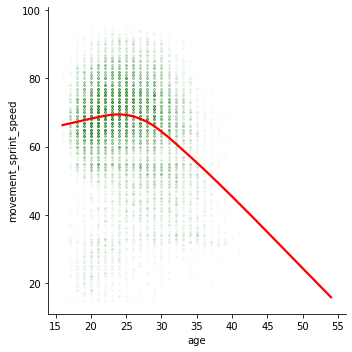

In [160]:
sns.lmplot(data = df, x = 'age', y = 'movement_sprint_speed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})
# as age increases sprint speed decreases

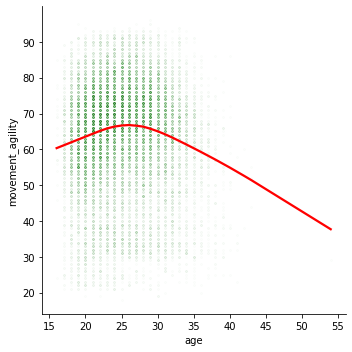

In [15]:
sns.lmplot(data = df, x = 'age', y = 'movement_agility',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})
# Same for agility

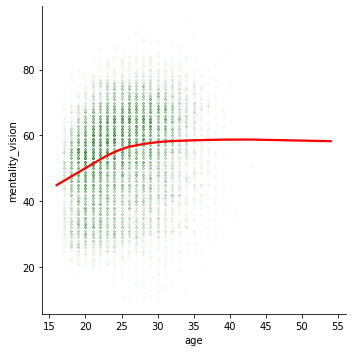

In [16]:
sns.lmplot(data = df, x = 'age', y = 'mentality_vision',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})
# But in contrast to the pace and agility, the vision as the age increases player gains more experiences and gains more vision

In [161]:
{df.columns.get_loc(col):col for col in  df.columns}

{0: 'overall',
 1: 'potential',
 2: 'age',
 3: 'league_level',
 4: 'club_position',
 5: 'preferred_foot',
 6: 'weak_foot',
 7: 'skill_moves',
 8: 'international_reputation',
 9: 'work_rate',
 10: 'attacking_crossing',
 11: 'attacking_finishing',
 12: 'attacking_heading_accuracy',
 13: 'attacking_short_passing',
 14: 'attacking_volleys',
 15: 'skill_dribbling',
 16: 'skill_curve',
 17: 'skill_fk_accuracy',
 18: 'skill_long_passing',
 19: 'skill_ball_control',
 20: 'movement_acceleration',
 21: 'movement_sprint_speed',
 22: 'movement_agility',
 23: 'movement_reactions',
 24: 'movement_balance',
 25: 'power_shot_power',
 26: 'power_jumping',
 27: 'power_stamina',
 28: 'power_strength',
 29: 'power_long_shots',
 30: 'mentality_aggression',
 31: 'mentality_interceptions',
 32: 'mentality_positioning',
 33: 'mentality_vision',
 34: 'mentality_penalties',
 35: 'mentality_composure',
 36: 'defending_marking_awareness',
 37: 'defending_standing_tackle',
 38: 'defending_sliding_tackle',
 39: 'go

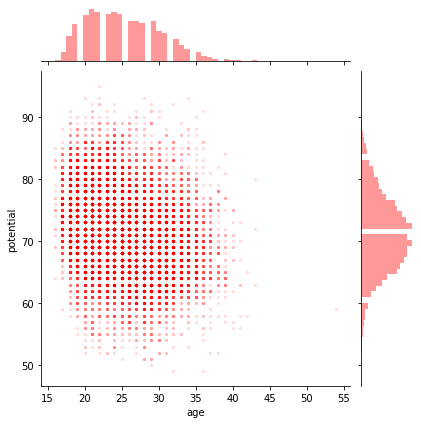

In [19]:

sns.jointplot(x=df['age'],y=df['potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

#Potential tends to fall as player grow old

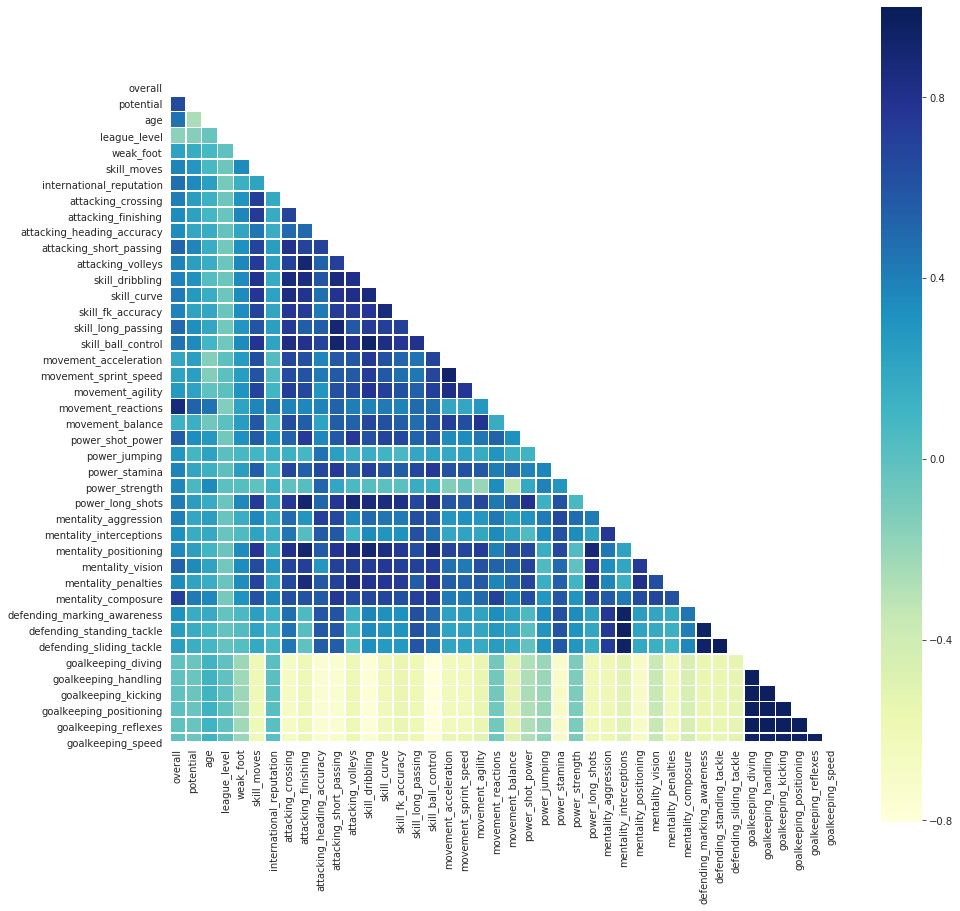

In [20]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")


Lowest correlation among the goalkeeping side with other columns and high among themselves

High correlation between Dribbling, Volleys, Passing etc...

Lets use those columns to predict the ratings

# 5. Modelling

In [165]:
#Create a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['club_position'] == 'GK'):
        return 'GK'
    elif ((df['club_position'] == 'RB') | (df['club_position'] == 'LB') | (df['club_position'] == 'CB') | (df['club_position'] == 'LCB') | (df['club_position'] == 'RCB') | (df['club_position'] == 'RWB') | (df['club_position'] == 'LWB') ):
        return 'DF'
    elif ((df['club_position'] == 'LDM') | (df['club_position'] == 'CDM') | (df['club_position'] == 'RDM')):
        return 'DM'
    elif ((df['club_position'] == 'LM') | (df['club_position'] == 'LCM') | (df['club_position'] == 'CM') | (df['club_position'] == 'RCM') | (df['club_position'] == 'RM')):
        return 'MF'
    elif ((df['club_position'] == 'LAM') | (df['club_position'] == 'CAM') | (df['club_position'] == 'RAM') | (df['club_position'] == 'LW') | (df['club_position'] == 'RW')):
        return 'AM'
    elif ((df['club_position'] == 'RS') | (df['club_position'] == 'ST') | (df['club_position'] == 'LS') | (df['club_position'] == 'CF') | (df['club_position'] == 'LF') | (df['club_position'] == 'RF')):
        return 'ST'
    else:
        return df.club_position


In [166]:
df['preferred_foot'] = df['preferred_foot'].map({'Right': 1, 'Left': 0})

In [167]:
df1 = df.copy()

In [168]:
df1.head(5)

,overall,potential,age,league_level,club_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,93,93,34,1.0,RW,0,4,4,5,Medium/Low,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0
1,92,92,32,1.0,ST,1,4,4,5,High/Medium,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0
2,91,91,36,1.0,ST,1,4,5,5,High/Low,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0
3,91,91,29,1.0,LW,1,5,5,5,High/Medium,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0
4,91,91,30,1.0,RCM,1,5,4,4,High/High,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0


In [169]:
df1.isnull().sum()

overall                        0
potential                      0
age                            0
league_level                   0
club_position                  0
preferred_foot                 0
weak_foot                      0
skill_moves                    0
international_reputation       0
work_rate                      0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long_shots               0
mentality_

In [170]:
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)

In [171]:
df1.head(5)

,overall,potential,age,league_level,club_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,Simple_Position
0,93,93,34,1.0,RW,0,4,4,5,Medium/Low,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,AM
1,92,92,32,1.0,ST,1,4,4,5,High/Medium,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,ST
2,91,91,36,1.0,ST,1,4,5,5,High/Low,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,ST
3,91,91,29,1.0,LW,1,5,5,5,High/Medium,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,AM
4,91,91,30,1.0,RCM,1,5,4,4,High/High,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,MF


In [172]:
#Split the Work Rate Column in two
tempwork = df1["work_rate"].str.split("/", n = 1, expand = True) 
#Create new column for first work rate
df1["WorkRate1"]= tempwork[0]   
#Create new column for second work rate
df1["WorkRate2"]= tempwork[1]

In [173]:
df1.head(5)

,overall,potential,age,league_level,club_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,Simple_Position,WorkRate1,WorkRate2
0,93,93,34,1.0,RW,0,4,4,5,Medium/Low,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,AM,Medium,Low
1,92,92,32,1.0,ST,1,4,4,5,High/Medium,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,ST,High,Medium
2,91,91,36,1.0,ST,1,4,5,5,High/Low,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,ST,High,Low
3,91,91,29,1.0,LW,1,5,5,5,High/Medium,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,AM,High,Medium
4,91,91,30,1.0,RCM,1,5,4,4,High/High,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,MF,High,High


In [175]:
df1.drop(['work_rate','club_position'], axis = 1 , inplace = True)

In [142]:
df1.head(5)

,overall,potential,age,league_level,preferred_foot,weak_foot,skill_moves,international_reputation,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,Simple_Position,WorkRate1,WorkRate2
0,93,93,34,1.0,0,4,4,5,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,AM,Medium,Low
1,92,92,32,1.0,1,4,4,5,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,ST,High,Medium
2,91,91,36,1.0,1,4,5,5,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,ST,High,Low
3,91,91,29,1.0,1,5,5,5,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,AM,High,Medium
4,91,91,30,1.0,1,5,4,4,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,MF,High,High


## Step 5: Filter Results and Build/Validate Models


Perform any additional data carpentry and begin filtering results/data and then build, validate, and describe your model(s). 

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [177]:

#Split ID as a Target value
target = df1.overall
df2 = df1.drop(['overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3848, 56) (15391, 56)
(3848,) (15391,)


In [178]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.936223180595571
RMSE : 1.7274085062660742


## Step 6: Visualize Results

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

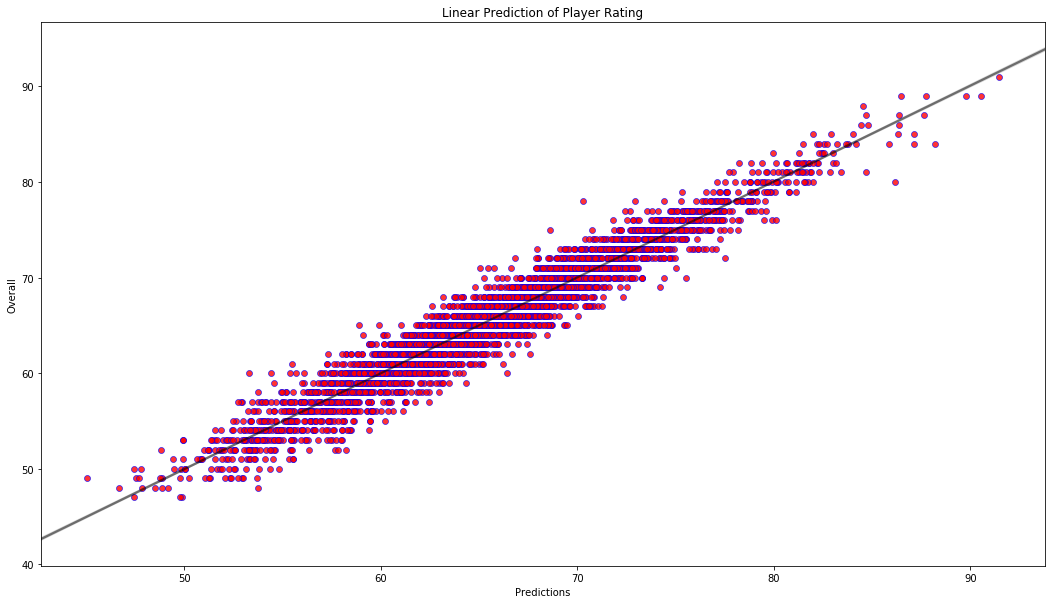

In [179]:
#Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

## Step 7: Communicate the Story to your intended audience using visualizations and narrative


This notebook explains in depth analysis of Fifa 22 soccer game analysis and player rating prediction using Linear regression model. People can look at the norebook and gain knowledge on how missing values can be handled or can be filled with apppropriate values based on the attributes. Data analysis part which explains how important attribute changes over time and Potential of the players which is one of the most important attribute in the game with respect to age. 

Most of the data visualizations are done using seaborn which comess in handy while visualizing machine learning models. Correlation matrix was my compelling visual which explains which attributes have to be selected for the model prediction.

Finally my model have predicted 93% accuracy which was unbelievable at the begining but it is what it is!!












# Save your notebook, then `File > Close and Halt`